# 📊 Emotion Recognition Report Summary

**Nhóm thực hiện:** Lê Bảo Hưng, Nguyễn Văn Thái, Nguyễn Quang Hiệp

---

## 1. Dataset Overview & Class Distribution


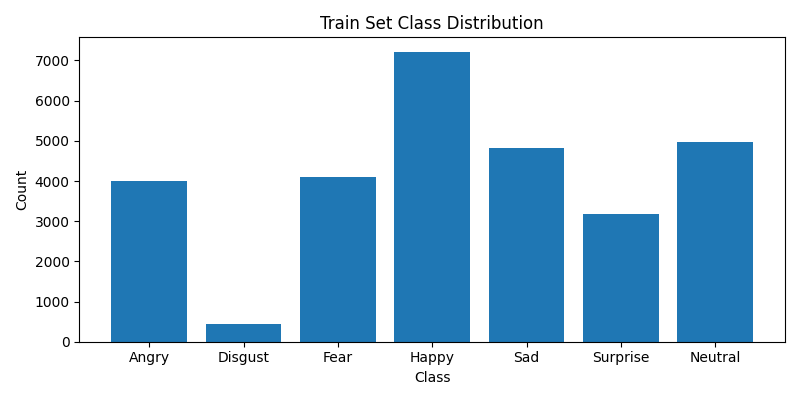

Class distribution for train


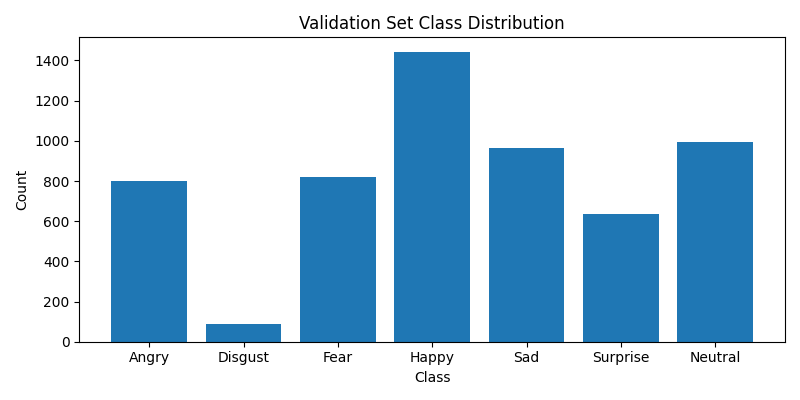

Class distribution for val


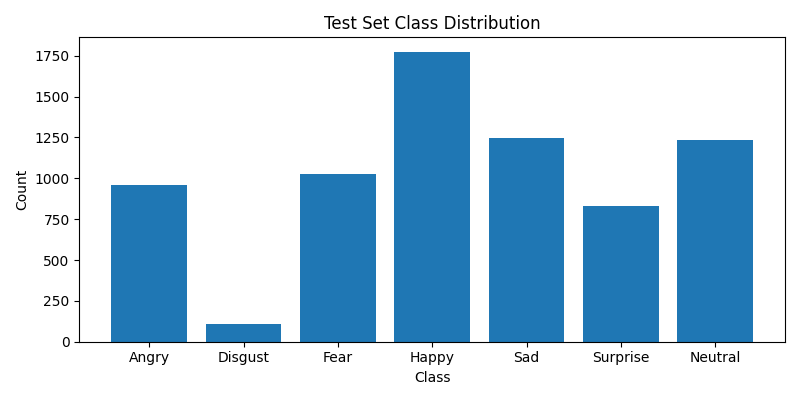

Class distribution for test


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import json
import os
import pandas as pd
from IPython.display import display, Markdown

# Hiển thị biểu đồ phân phối lớp
for split in ['train', 'val', 'test']:
    img_path = f'../results/{split}_class_dist_analysis.png'
    if os.path.exists(img_path):
        display(Image.open(img_path))
        print(f'Class distribution for {split}')


## 2. Sample Images per Class


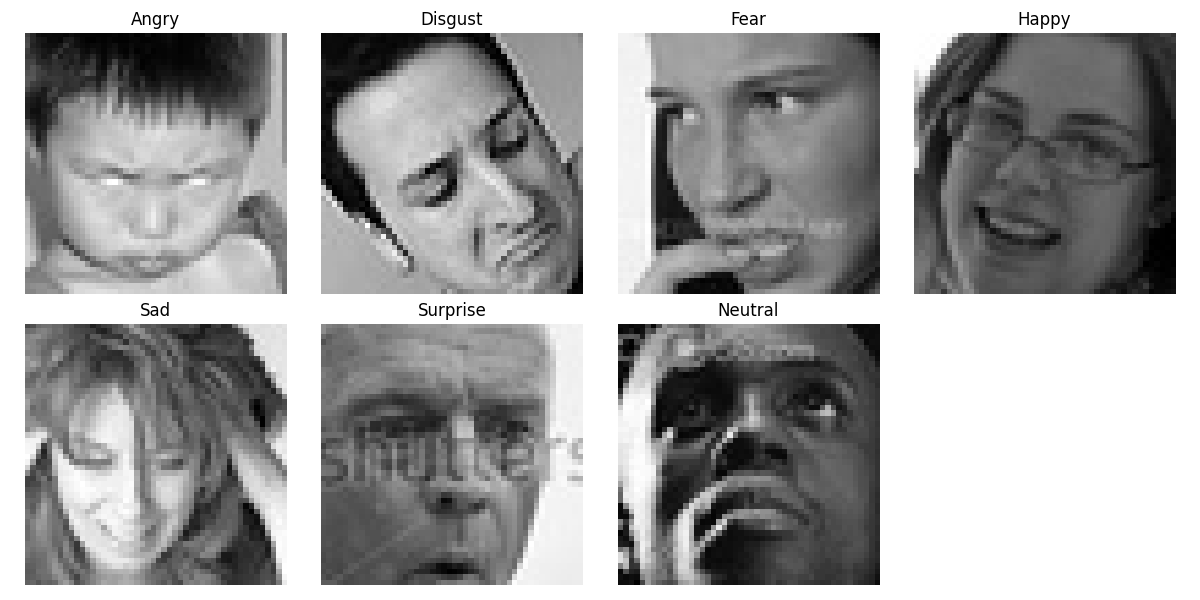

Sample images for train


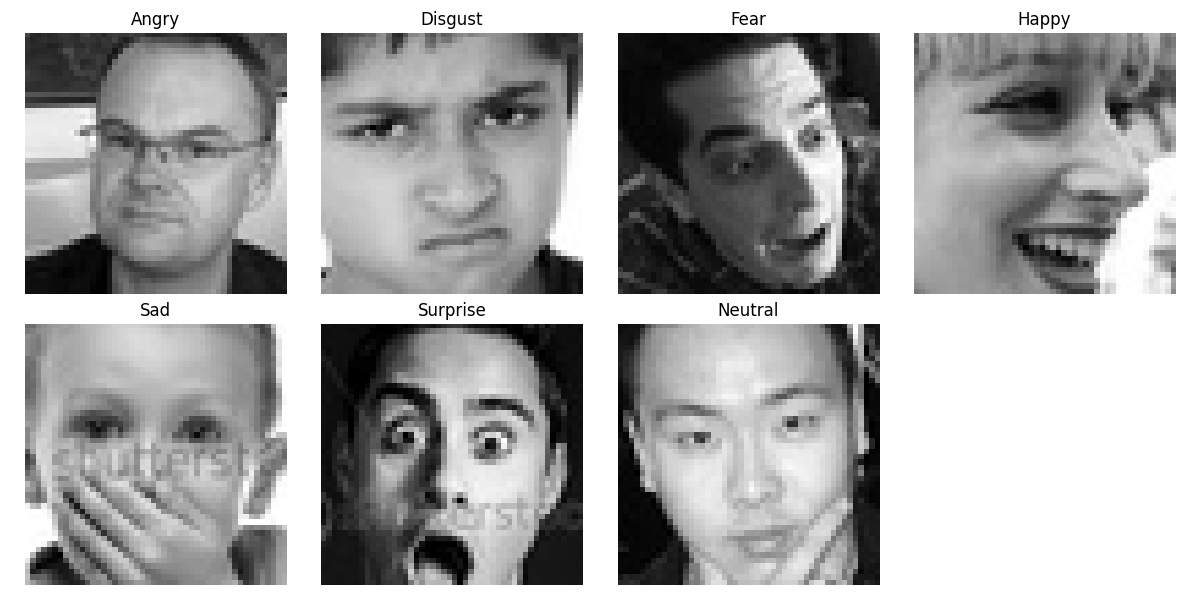

Sample images for val


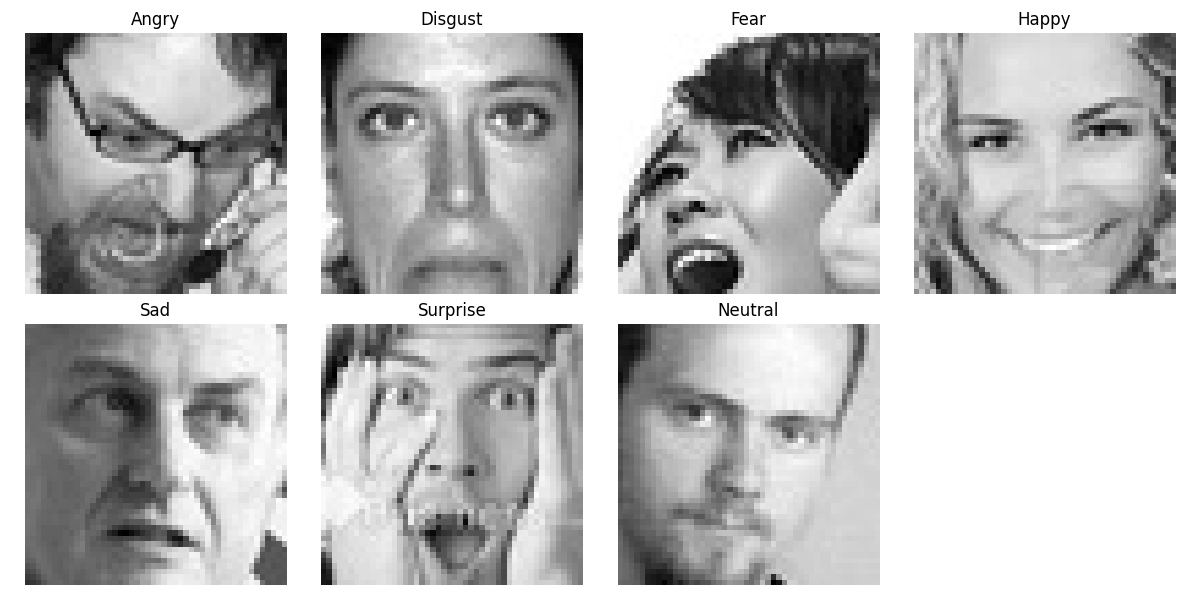

Sample images for test


In [2]:
for split in ['train', 'val', 'test']:
    img_path = f'../results/{split}_samples.png'
    if os.path.exists(img_path):
        display(Image.open(img_path))
        print(f'Sample images for {split}')


## 3. Training & Validation Curves


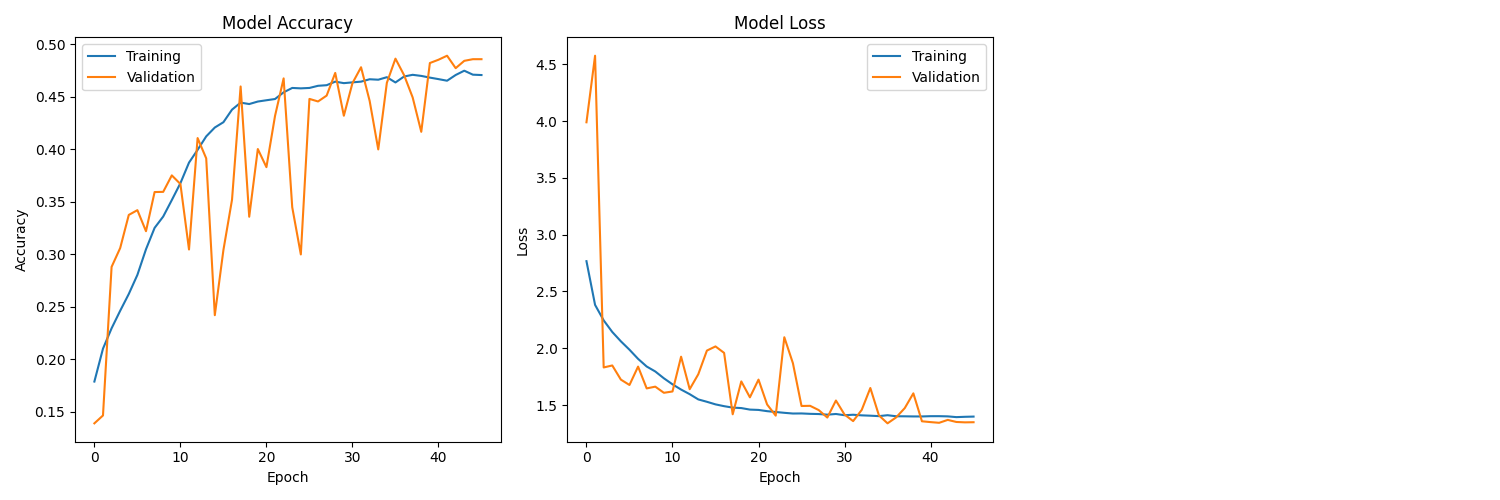

In [3]:
img_path = '../results/training_plots.png'
if os.path.exists(img_path):
    display(Image.open(img_path))


## 4. Confusion Matrix


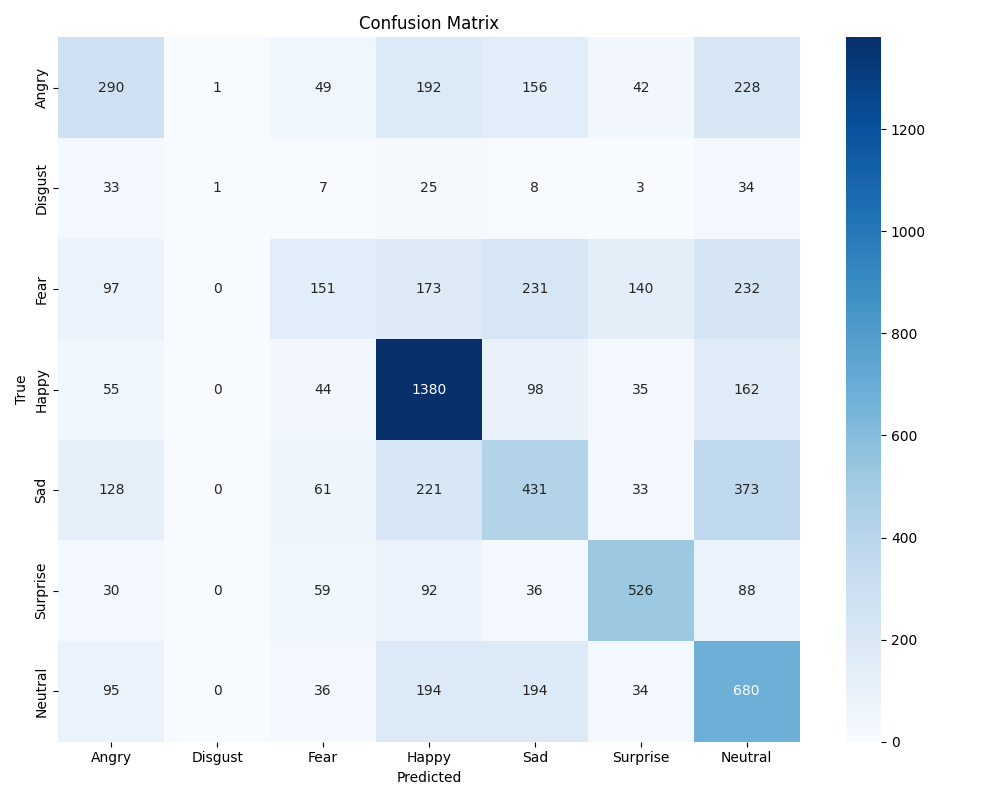

In [4]:
img_path = '../results/confusion_matrix.png'
if os.path.exists(img_path):
    display(Image.open(img_path))


## 5. Classification Report (Table & LaTeX)


In [5]:
with open('../results/classification_report.json') as f:
    report = json.load(f)
df = pd.DataFrame(report).T
display(df)
# Xuất bảng LaTeX
latex_table = df.to_latex(float_format='%.3f')
display(Markdown('**LaTeX Table:**'))
print(latex_table)


,precision,recall,f1-score,support
Angry,0.398352,0.302714,0.344009,958.000000
Disgust,0.500000,0.009009,0.017699,111.000000
Fear,0.371007,0.147461,0.211041,1024.000000
Happy,0.606061,0.777903,0.681313,1774.000000
Sad,0.373484,0.345630,0.359017,1247.000000
Surprise,0.646986,0.632972,0.639903,831.000000
Neutral,0.378408,0.551500,0.448845,1233.000000
accuracy,0.481889,0.481889,0.481889,0.481889
macro avg,0.467757,0.395313,0.385975,7178.000000
weighted avg,0.468395,0.481889,0.458228,7178.000000


**LaTeX Table:**

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
Angry & 0.398 & 0.303 & 0.344 & 958.000 \\
Disgust & 0.500 & 0.009 & 0.018 & 111.000 \\
Fear & 0.371 & 0.147 & 0.211 & 1024.000 \\
Happy & 0.606 & 0.778 & 0.681 & 1774.000 \\
Sad & 0.373 & 0.346 & 0.359 & 1247.000 \\
Surprise & 0.647 & 0.633 & 0.640 & 831.000 \\
Neutral & 0.378 & 0.552 & 0.449 & 1233.000 \\
accuracy & 0.482 & 0.482 & 0.482 & 0.482 \\
macro avg & 0.468 & 0.395 & 0.386 & 7178.000 \\
weighted avg & 0.468 & 0.482 & 0.458 & 7178.000 \\
\bottomrule
\end{tabular}



## 6. Misclassified Examples
Hiển thị một số ảnh bị nhầm lẫn điển hình (true label, predicted label):


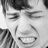

true_0_pred_2_10.png


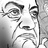

true_0_pred_2_5.png


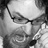

true_0_pred_3_0.png


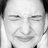

true_0_pred_3_25.png


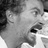

true_0_pred_4_1.png


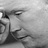

true_0_pred_4_18.png


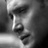

true_0_pred_4_2.png


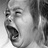

true_0_pred_4_29.png


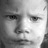

true_0_pred_4_32.png


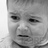

true_0_pred_4_33.png


In [6]:
import glob
misclassified_dir = '../results/misclassified/'
mis_imgs = sorted(glob.glob(misclassified_dir + '*.png'))
for img_path in mis_imgs[:10]:
    display(Image.open(img_path))
    print(os.path.basename(img_path))


## 7. Training Summary & Hyperparameters


In [7]:
with open('../results/training_results.json') as f:
    train_results = json.load(f)
display(pd.DataFrame([train_results]))


,training_time_seconds,final_epoch,early_stopping_epoch,final_learning_rate,test_accuracy,test_loss,best_val_accuracy,best_val_loss
0,2554.035798,46,None,1.000000e-06,0.481889,1.3501,0.489028,1.338957


## 8. Limitations & Future Work

**Limitations:**
- Dữ liệu mất cân bằng, lớp Disgust rất ít mẫu nên model khó học tốt.
- Một số cảm xúc khó phân biệt (Sad/Neutral, Fear/Surprise) vẫn bị nhầm lẫn.
- Model custom chưa tận dụng được sức mạnh của transfer learning.
- Chưa thử nghiệm nhiều augmentation hoặc regularization nâng cao.

**Future Work:**
- Thử nghiệm transfer learning với các model mạnh hơn (MobileNet, EfficientNet, ResNet).
- Tăng cường dữ liệu cho các lớp ít mẫu, thử focal loss hoặc class weights.
- Phân tích lỗi sâu hơn, thử các kỹ thuật explainable AI.
- Triển khai real-time hoặc ứng dụng thực tế.
